## Application du clustering au données digits

In [4]:
import numpy as np
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Chargement des données ======================================================
digits=np.loadtxt("digits_extrait_images.csv", delimiter=',',skiprows=1,usecols=range(1,785))
labels=np.loadtxt("digits_extrait_labels.csv", delimiter=',',skiprows=1,usecols=range(1,2))
labels=labels.astype(int)

### Réalisation du clustering

Le nombre de classes nclus est choisi par défaut comme égal au nombre d'étiquettes

In [5]:
# Clustering avec la fonction KMeans du module scikit learn ===================
k_means = KMeans(init='k-means++', n_clusters=len(np.unique(labels)), n_init=10)
k_means.fit(digits)
cl = k_means.labels_ # classes "prédites" 
print(cl[range(20)])
print(labels[range(20)])


[1 3 3 2 2 2 2 0 2 2 2 0 2 1 3 4 4 4 0 2]
[0 2 2 1 1 1 1 3 1 1 1 2 1 0 2 4 4 4 3 1]


 ### Images des centres de classe


Centres de classe:


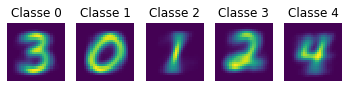

In [6]:
#  Images des centres de classe
print('\nCentres de classe:')
plt.close('all')
fig=plt.figure(2)
plt.clf()
for k in range(k_means.n_clusters):
  plt.subplot(1,k_means.n_clusters,k+1)
  plt.imshow(np.reshape(k_means.cluster_centers_[k,:],[28,28]))
  plt.title("Classe "+str(k))
  plt.axis('off')
plt.show()

### Calcul de l'étiquette majoritaire de chaque classe

In [17]:
print("Classe".ljust(19,'.')+" ",end='')
for k in range(k_means.n_clusters): print(str(k)+" ",end='')
print("\n"+"Label majoritaire".ljust(19,'.')+" ",end='')
cl_lab = np.copy(cl)
for k in range(k_means.n_clusters):
  counts=np.unique(labels[cl==k],return_counts=True) # Nb d'occurences de chaque label
  maj_lab=labels[np.argmax(counts[1])] # Son étiquette
  imax=np.argmax(counts[1]) # Calcul du majoritaire
  maj_lab=counts[0][imax] # Son étiquette
  print(str(maj_lab),end=' ')
  cl_lab[cl==k] = maj_lab
cl_lab = np.copy(cl)
print('\n')

Classe............. 0 1 2 3 4 
Label majoritaire.. 0 2 3 1 4 



### Calcul de la matrice de confusion brute

In [18]:
conf_mat =  confusion_matrix(labels,cl)
print("Matrice de confusion:")
print("   Une ligne = un digit\n   Une colonne = un cluster\n")
print(conf_mat)

Matrice de confusion:
   Une ligne = un digit
   Une colonne = un cluster

[[513  12  37   1  11]
 [  0  12   2 672   1]
 [  9 433  52  61  23]
 [  6  24 534  32  15]
 [  1   6   0  13 557]]


### Représentation en barplot

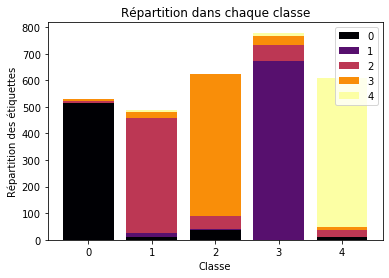

In [19]:
def BarPlotMat(M): 
# Fait un barplot pour chaque colonne de M.
# La couleur correspond à l'indice, la hauteur à la valeur
  I=M.shape[0]
  J=M.shape[1]
  ind = np.arange(J)
  haut = 0*M[0,:]
  for i in range(I):
    plt.bar(ind,M[i,:],bottom=haut,color=plt.cm.inferno(i/(I-1)))
    haut += M[i,:]
fig=plt.figure(3)
plt.clf()
BarPlotMat(conf_mat)
plt.xlabel('Classe')
plt.ylabel('Répartition des étiquettes')
plt.title('Répartition dans chaque classe')
plt.legend(['0','1','2','3','4',])